# Example for using fleet modeling in AeroMAPS

This notebook aims at using the classes dedicated to the fleet modelling that are used in AeroMAPS.

## Link with other AeroMAPS models

This fleet model can be used in AeroMAPS for improving the modeling of the fleet efficiency. For this purpose, a dedicated model is loaded, based on the bottom-up approach using fleet model. It replaces the basic top-down approach for modeling the evolution of the fleet efficiency, based on annual efficiency gains.

In [1]:
%matplotlib widget
from aeromaps.core.process import AeroMAPSProcess
from aeromaps.core.models import (
    models_traffic,
    models_efficiency_bottom_up,
    models_energy_without_fuel_effect,
    models_offset,
    models_climate_simple_gwpstar,
    models_sustainability,
)

In [2]:
models = {
    "models_traffic": models_traffic,
    "models_efficiency_bottom_up": models_efficiency_bottom_up,
    "models_energy_without_fuel_effect": models_energy_without_fuel_effect,
    "models_offset": models_offset,
    "models_climate_simple_gwpstar": models_climate_simple_gwpstar,
    "models_sustainability": models_sustainability,
}

In [3]:
process = AeroMAPSProcess(
    models=models,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=True,
)

Here, an example using the previous fleet generated is performed with the AeroMAPS default float inputs. The hydrogen used for hydrogen aircraft is assumed to be produced via electrolysis using dedicated low-carbon electricity.

In [4]:
# Change end year
process.parameters.end_year = 2060
process.setup(add_examples_aircraft_and_subcategory=True)

In [5]:
# Hydrogen production
process.parameters.hydrogen_electrolysis_share_reference_years = []
process.parameters.hydrogen_electrolysis_share_reference_years_values = [100]
process.parameters.hydrogen_gas_ccs_share_reference_years = []
process.parameters.hydrogen_gas_ccs_share_reference_years_values = [0]
process.parameters.hydrogen_coal_ccs_share_reference_years = []
process.parameters.hydrogen_coal_ccs_share_reference_years_values = [0]
process.parameters.hydrogen_gas_share_reference_years = []
process.parameters.hydrogen_gas_share_reference_years_values = [0]
# Electricity emission factor
process.parameters.electricity_emission_factor_reference_years = []
process.parameters.electricity_emission_factor_reference_years_values = [20.0]

## Load and process

In [6]:
import pandas as pd

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

The fleet is divided into three main categories of aircraft, associated to an initial subcategory based on representative aircraft:
- Short range (Conventional narrow-body)
- Medium range (Conventional narrow-body)
- Long range (Conventional wide-body)

Lets now assemble these categories into a fleet object. By default, two new aircraft have been added to the initial subcategories, and two subcategories have also been added for Short Range (turboprop aircraft and hydrogen aircraft). Illustrative values are considered.

In [7]:
fleet = process.fleet
fleet_model = process.fleet_model

## Set up the fleet

A dedicated user interface can be used for modifying the fleet using the following command. The can then directly change the future composition of the fleet by simply adding subcategories and aircraft. For subcategories, the final distribution between the different subcategories among a category has to be indicated. For aircraft, the user can choose an Entry-Into-Service year as well as the type of fuel used (DROP_IN_FUEL or HYDROGEN). The gains in terms of fuel consumption, NOx emission index and soot emission index, in comparison to the recent reference aircraft in the initial subcategory, also have to be specified. Negative values can be considered, meaning an increase in fuel consumption for instance.

In [8]:
fleet.ui

You can change fleet renewal rates for each category. The default value is 25 years.

In [9]:
fleet.categories["Medium Range"].parameters.life = 20

## Compute and results for the fleet model

Once the fleet has been chosen, the user can compute.

In [10]:
fleet_model.compute()

The user can then display the results.

In [11]:
fleet_model.df

,Short Range:SR hydrogen conventional narrow-body:New Short-range hydrogen:single_aircraft_share,Short Range:SR regional turboprop:New Regional turboprop 1:single_aircraft_share,Short Range:SR regional turboprop:New Regional turboprop 2:single_aircraft_share,Short Range:SR conventional narrow-body:recent_reference:single_aircraft_share,Short Range:SR conventional narrow-body:old_reference:single_aircraft_share,Short Range:SR conventional narrow-body:New Short-range Narrow-body 1:single_aircraft_share,Short Range:SR conventional narrow-body:New Short-range Narrow-body 2:single_aircraft_share,Medium Range:MR conventional narrow-body:recent_reference:single_aircraft_share,Medium Range:MR conventional narrow-body:old_reference:single_aircraft_share,Medium Range:MR conventional narrow-body:New Medium-range narrow-body 1:single_aircraft_share,Medium Range:MR conventional narrow-body:New Medium-range narrow-body 2:single_aircraft_share,Long Range:LR conventional wide-body:recent_reference:single_aircraft_share,Long Range:LR conventional wide-body:old_reference:single_aircraft_share,Long Range:LR conventional wide-body:New Long-range wide-body 1:single_aircraft_share,Long Range:LR conventional wide-body:New Long-range wide-body 2:single_aircraft_share,Short Range:SR hydrogen conventional narrow-body:New Short-range hydrogen:aircraft_share,Short Range:SR regional turboprop:New Regional turboprop 2:aircraft_share,Short Range:SR regional turboprop:New Regional turboprop 1:aircraft_share,Short Range:SR conventional narrow-body:New Short-range Narrow-body 2:aircraft_share,Short Range:SR conventional narrow-body:New Short-range Narrow-body 1:aircraft_share,Short Range:SR conventional narrow-body:recent_reference:aircraft_share,Short Range:SR conventional narrow-body:old_reference:aircraft_share,Medium Range:MR conventional narrow-body:New Medium-range narrow-body 2:aircraft_share,Medium Range:MR conventional narrow-body:New Medium-range narrow-body 1:aircraft_share,Medium Range:MR conventional narrow-body:recent_reference:aircraft_share,Medium Range:MR conventional narrow-body:old_reference:aircraft_share,Long Range:LR conventional wide-body:New Long-range wide-body 2:aircraft_share,Long Range:LR conventional wide-body:New Long-range wide-body 1:aircraft_share,Long Range:LR conventional wide-body:recent_reference:aircraft_share,Long Range:LR conventional wide-body:old_reference:aircraft_share,Short Range:SR conventional narrow-body:energy_consumption,Short Range:SR conventional narrow-body:energy_consumption:dropin_fuel,Short Range:SR conventional narrow-body:energy_consumption:hydrogen,Short Range:SR conventional narrow-body:energy_consumption:electric,Short Range:SR conventional narrow-body:energy_consumption:hybrid_electric,Short Range:SR conventional narrow-body:share:total,Short Range:SR conventional narrow-body:share:dropin_fuel,Short Range:SR conventional narrow-body:share:hydrogen,Short Range:SR conventional narrow-body:share:electric,Short Range:SR conventional narrow-body:share:hybrid_electric,Short Range:share:dropin_fuel,Short Range:share:hydrogen,Short Range:share:electric,Short Range:share:hybrid_electric,Short Range:SR regional turboprop:energy_consumption,Short Range:SR regional turboprop:energy_consumption:dropin_fuel,Short Range:SR regional turboprop:energy_consumption:hydrogen,Short Range:SR regional turboprop:energy_consumption:electric,Short Range:SR regional turboprop:energy_consumption:hybrid_electric,Short Range:SR regional turboprop:share:total,Short Range:SR regional turboprop:share:dropin_fuel,Short Range:SR regional turboprop:share:hydrogen,Short Range:SR regional turboprop:share:electric,Short Range:SR regional turboprop:share:hybrid_electric,Short Range:SR hydrogen conventional narrow-body:energy_consumption,Short Range:SR hydrogen conventional narrow-body:energy_consumption:dropin_fuel,Short Range:SR hydrogen conventional narrow-body:energy_consumption:hydrogen,Short Range:SR hydrogen conventional narrow-body:

More simply, the user can plot fleet renewal and its impact on energy consumption per ASK for each category.

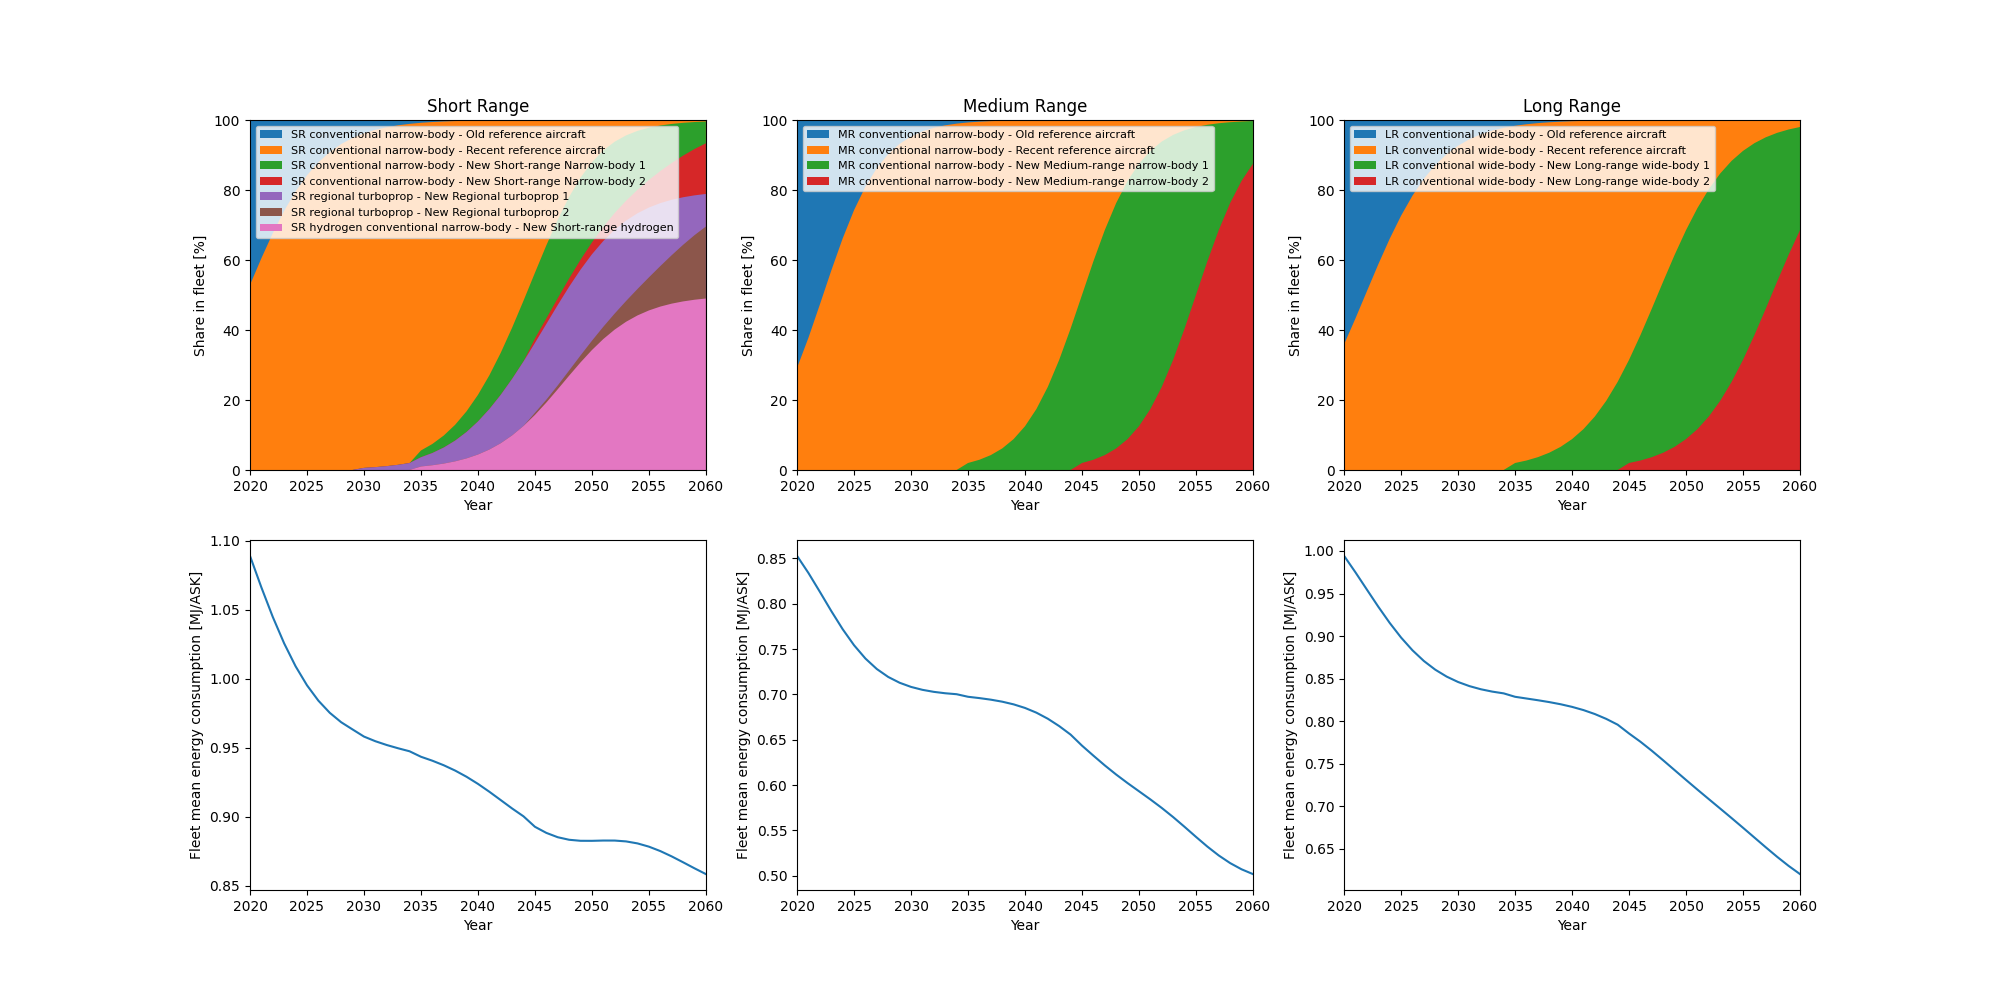

In [12]:
fleet_model.plot()

## Compute and results for the global model

The user can finally run the global model for studying a prospective scenario for air transport based on a hand-made fleet.

In [13]:
process.compute()

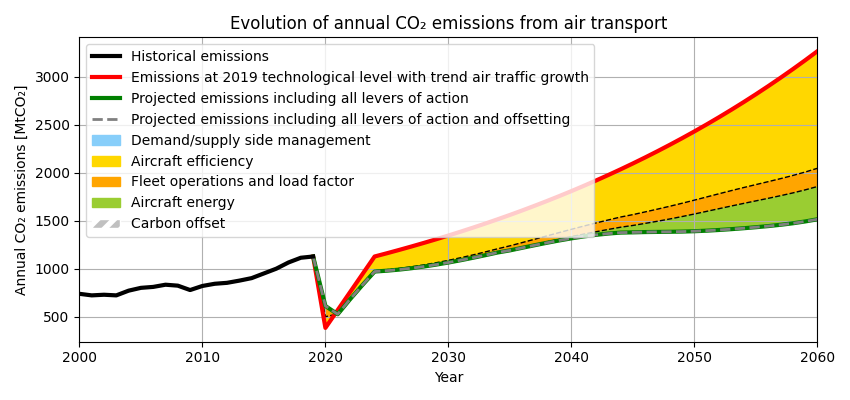

In [14]:
process.plot("air_transport_co2_emissions")